In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
import pandas as pd

In [2]:
data_train_file = "/content/fashion-mnist_test.csv"
data_test_file = "/content/fashion-mnist_train.csv"

df_train = pd.read_csv(data_train_file)
df_test = pd.read_csv(data_test_file)

In [5]:
from sklearn.model_selection import train_test_split

In [10]:

(X_train, Y_train), (X_test, Y_test) = keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [11]:
X_train = X_train.reshape(X_train.shape[0], 784)
X_test = X_test.reshape(X_test.shape[0], 784)
Y_train = Y_train.reshape(X_train.shape[0], 1)
Y_test = Y_test.reshape(X_test.shape[0], 1)

In [12]:
# Explore the dataset
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (60000, 784)
Y_train shape: (60000, 1)
X_test shape: (10000, 784)
Y_test shape: (10000, 1)


In [13]:
# normalize the xalues
X_train = X_train/255.0
X_test = X_test/255.0

In [14]:
mapping = {0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}

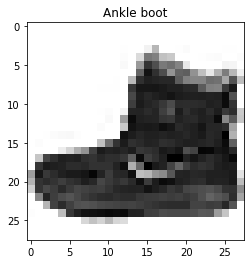

In [15]:
#see any image of the dataset
i = 0
img = X_train[i, :]
img = img.reshape(28, 28)
plt.imshow(255 - img, cmap = 'gray')
plt.title(mapping[Y_train[i][0]]);

In [17]:
from keras.models import Sequential
from keras.layers import Input, Dense

In [18]:
# define the model
model = Sequential()
model.add(Dense(30, activation = 'relu', input_shape = (784, )))
model.add(Dense(20, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [19]:
# summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                23550     
_________________________________________________________________
dense_1 (Dense)              (None, 20)                620       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
Total params: 24,380
Trainable params: 24,380
Non-trainable params: 0
_________________________________________________________________


In [20]:
# compile the model
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [21]:
history = model.fit(X_train, Y_train, epochs = 50, batch_size = 512, validation_split = 0.2)

Epoch 1/50
94/94 [==============================] - 3s 7ms/step - loss: 1.5359 - accuracy: 0.4657 - val_loss: 0.6330 - val_accuracy: 0.7878
Epoch 2/50
94/94 [==============================] - 0s 4ms/step - loss: 0.5903 - accuracy: 0.8020 - val_loss: 0.5163 - val_accuracy: 0.8229
Epoch 3/50
94/94 [==============================] - 0s 4ms/step - loss: 0.4910 - accuracy: 0.8320 - val_loss: 0.4696 - val_accuracy: 0.8350
Epoch 4/50
94/94 [==============================] - 0s 4ms/step - loss: 0.4529 - accuracy: 0.8433 - val_loss: 0.4488 - val_accuracy: 0.8409
Epoch 5/50
94/94 [==============================] - 1s 6ms/step - loss: 0.4338 - accuracy: 0.8463 - val_loss: 0.4294 - val_accuracy: 0.8504
Epoch 6/50
94/94 [==============================] - 0s 4ms/step - loss: 0.4139 - accuracy: 0.8543 - val_loss: 0.4178 - val_accuracy: 0.8550
Epoch 7/50
94/94 [==============================] - 0s 4ms/step - loss: 0.3930 - accuracy: 0.8612 - val_loss: 0.4101 - val_accuracy: 0.8560
Epoch 8/50
94/94 [==

In [22]:
# find the accuracy on train and test set
train_loss, train_acc = model.evaluate(X_train, Y_train)
test_loss, test_acc = model.evaluate(X_test, Y_test)
print("Accuracy on train set is %f" %(train_acc * 100)  + "%")
print("Accuracy on validation set is %f" %(test_acc * 100)  + "%")

313/313 [==============================] - 1s 2ms/step - loss: 0.3757 - accuracy: 0.8691
Accuracy on train set is 90.198332%
Accuracy on validation set is 86.909997%
